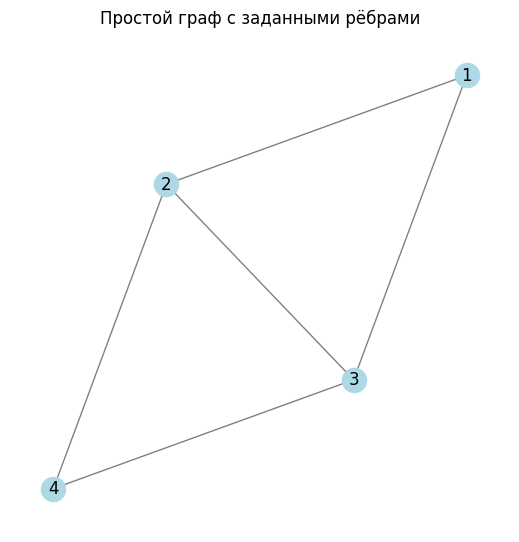

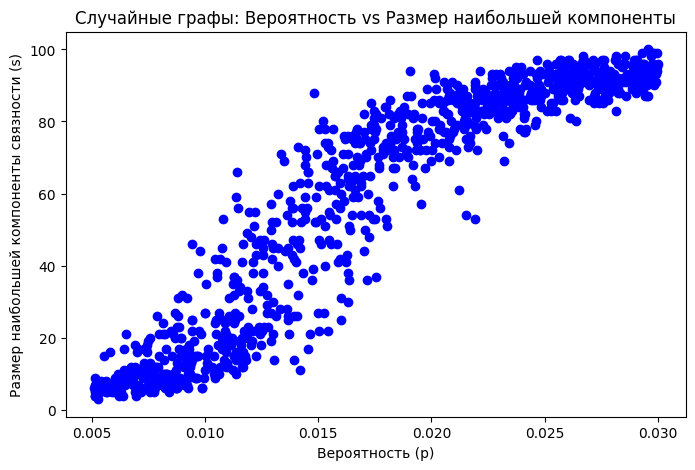

[[(1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 1, 1)], [(0, 1, 0), (0, 0, 0), (1, 0, 0), (1, 1, 0)], [(1, 0, 1), (0, 0, 1), (0, 0, 0), (1, 0, 0)], [(0, 1, 1), (0, 0, 1), (0, 0, 0), (1, 0, 0), (1, 1, 0), (1, 1, 1)], [(0, 1, 1), (0, 1, 0), (1, 1, 0), (1, 1, 1)]]

[[1, 2], [1, 2, 3], [1, 2, 4, 3], [1, 3], [1, 3, 2], [1, 3, 4, 2], [2, 3], [2, 3, 4], [2, 4], [2, 4, 3], [3, 4]]


In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import random

# 1. Создать и отобразить граф с заданными рёбрами
edges = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)]
G = nx.Graph(edges)
plt.figure(figsize=(5, 5))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='grey')
plt.title("Простой граф с заданными рёбрами")
plt.show()

# 2. Отобразить все базовые циклы (cycle_basis) в графе куба трёхмерного пространства
hypercube = nx.hypercube_graph(3)
cycles_in_hypercube = nx.cycle_basis(hypercube)

# 3. Найти все циклы в ориентированном графе (DiGraph)
DG = nx.DiGraph()
for edge in edges:
    DG.add_edge(edge[0], edge[1])
    DG.add_edge(edge[1], edge[0])  # Добавление обратного ребра для ориентированного графа
cycles_in_directed_graph = list(nx.simple_cycles(DG))

# 4. Создать случайный граф с 10 узлами и вероятностью соединения p=0.1
random_graph = nx.erdos_renyi_graph(10, 0.1)

# 5. Создать 1000 случайных графов с 100 узлами и построить график размера наибольшей компоненты связности
probabilities = []
component_sizes = []
for _ in range(1000):
    p = random.uniform(0.005, 0.03)
    graph = nx.erdos_renyi_graph(100, p)
    largest_component_size = len(max(nx.connected_components(graph), key=len))
    probabilities.append(p)
    component_sizes.append(largest_component_size)

# Построение результатов
plt.figure(figsize=(8, 5))
plt.scatter(probabilities, component_sizes, color='blue')
plt.xlabel("Вероятность (p)")
plt.ylabel("Размер наибольшей компоненты связности (s)")
plt.title("Случайные графы: Вероятность vs Размер наибольшей компоненты")
plt.show()

# Возврат результатов для задач 2 и 3
print(cycles_in_hypercube)
print()
print(cycles_in_directed_graph)

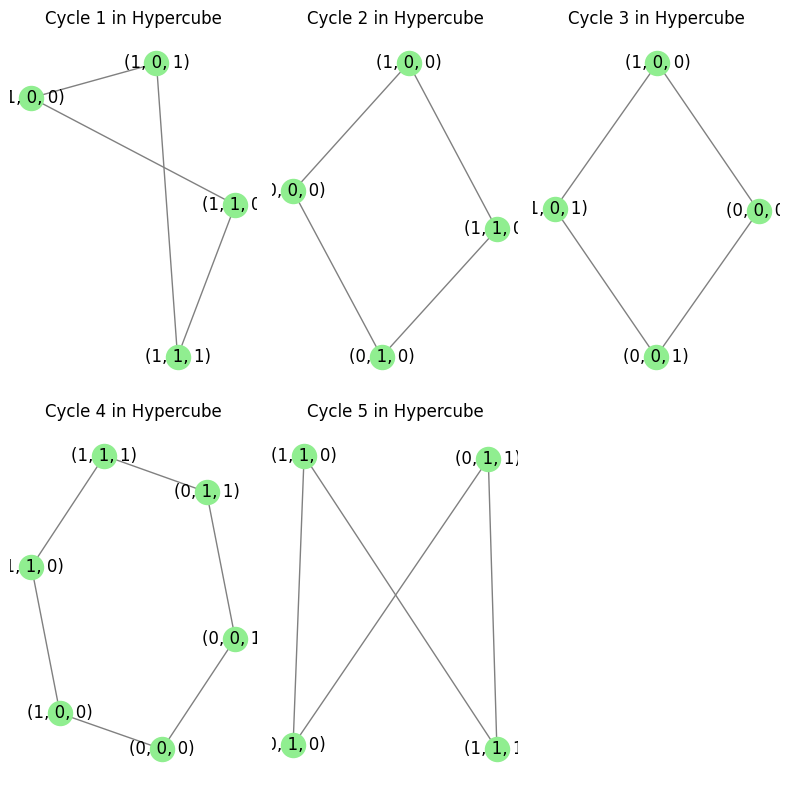

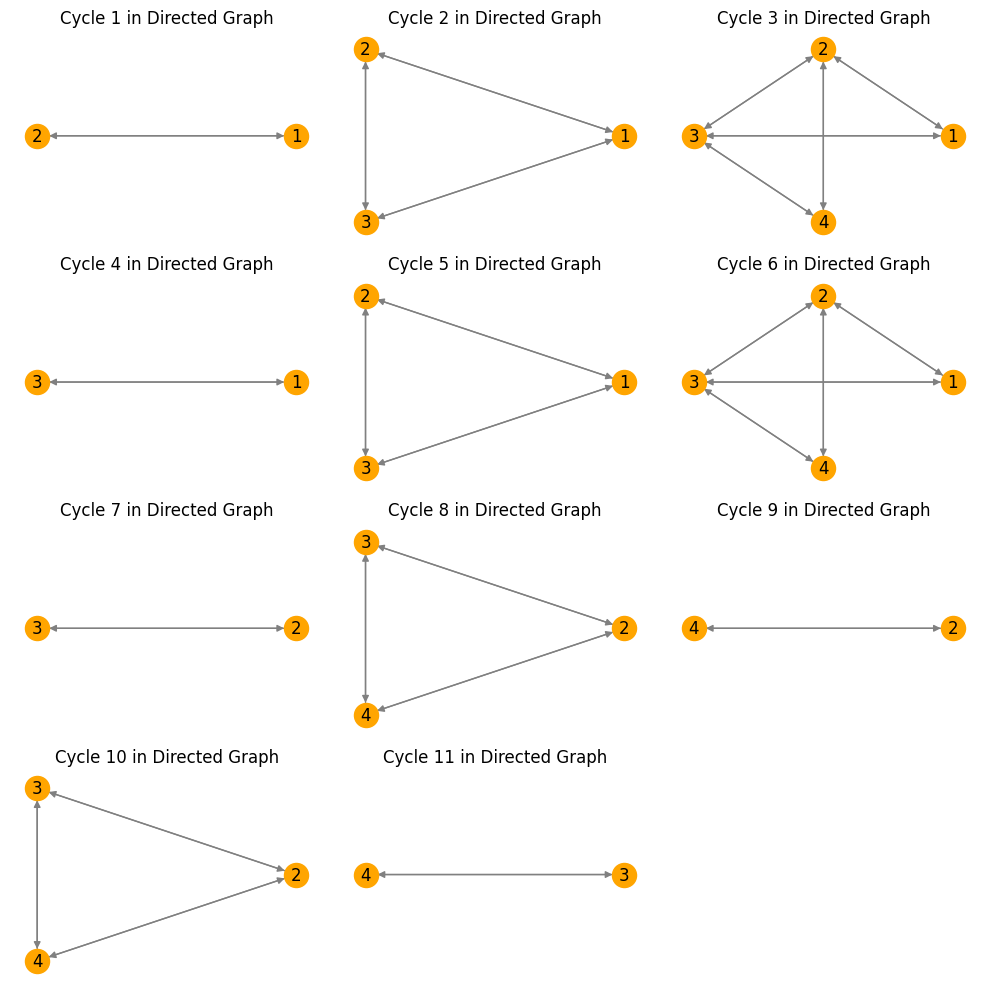

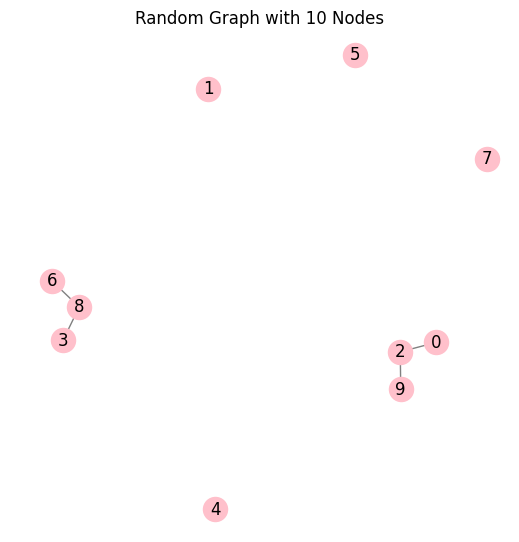

In [8]:
# Визуализация базовых циклов в 3-мерном гиперкубе
plt.figure(figsize=(8, 8))
for i, cycle in enumerate(cycles_in_hypercube, start=1):
    H = hypercube.subgraph(cycle)
    plt.subplot(2, 3, i)
    nx.draw(H, with_labels=True, node_color='lightgreen', edge_color='grey')
    plt.title(f"Cycle {i} in Hypercube")

plt.tight_layout()
plt.show()

# Визуализация циклов в ориентированном графе
plt.figure(figsize=(10, 10))
for i, cycle in enumerate(cycles_in_directed_graph, start=1):
    subgraph_nodes = set(cycle)
    H = DG.subgraph(subgraph_nodes)
    plt.subplot(4, 3, i)
    nx.draw_circular(H, with_labels=True, node_color='orange', edge_color='grey')
    plt.title(f"Cycle {i} in Directed Graph")

plt.tight_layout()
plt.show()

# Визуализация случайного графа с 10 узлами
plt.figure(figsize=(5, 5))
nx.draw(random_graph, with_labels=True, node_color='pink', edge_color='grey')
plt.title("Random Graph with 10 Nodes")
plt.show()


In [22]:
import requests
import typing as tp
import dataclasses
from tqdm import tqdm
import networkx as nx
import matplotlib.pyplot as plt
import time


# Конфигурация для доступа к API VK
VK_CONFIG = {
    "domain": "https://api.vk.com/method",
    "access_token": "2126a4932126a4932126a4932d2230fb32221262126a493447a39480ed689bccae06a16",
    "version": "5.124",
}

# Класс для получения ответа от метода friends.get
@dataclasses.dataclass(frozen=True)
class FriendsResponse:
    count: int
    items: tp.Union[tp.List[int], tp.List[tp.Dict[str, tp.Any]]]

# Функция для получения списка друзей пользователя
def get_friends(user_id: int, count: int = 5000, offset: int = 0, fields: tp.Optional[tp.List[str]] = None) -> FriendsResponse:
    domain = VK_CONFIG["domain"]
    access_token = VK_CONFIG["access_token"]
    v = VK_CONFIG["version"]
    query = f"{domain}/friends.get?access_token={access_token}&user_id={user_id}&fields={fields}&v={v}"
    response = requests.get(query)
    return FriendsResponse(**response.json()['response'])

# Пример использования
friends_response = get_friends(user_id=121150398)
print(friends_response.count)  # Выводит количество друзей


96


{'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'user_id', 'value': '37510011'}, {'key': 'v', 'value': '5.131'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'user_id', 'value': '68981125'}, {'key': 'v', 'value': '5.131'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'user_id', 'value': '85935449'}, {'key': 'v', 'value': '5.131'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'user_id', 'value': '88475836'}, {'key': 'v', 'value': '5.131'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'user_

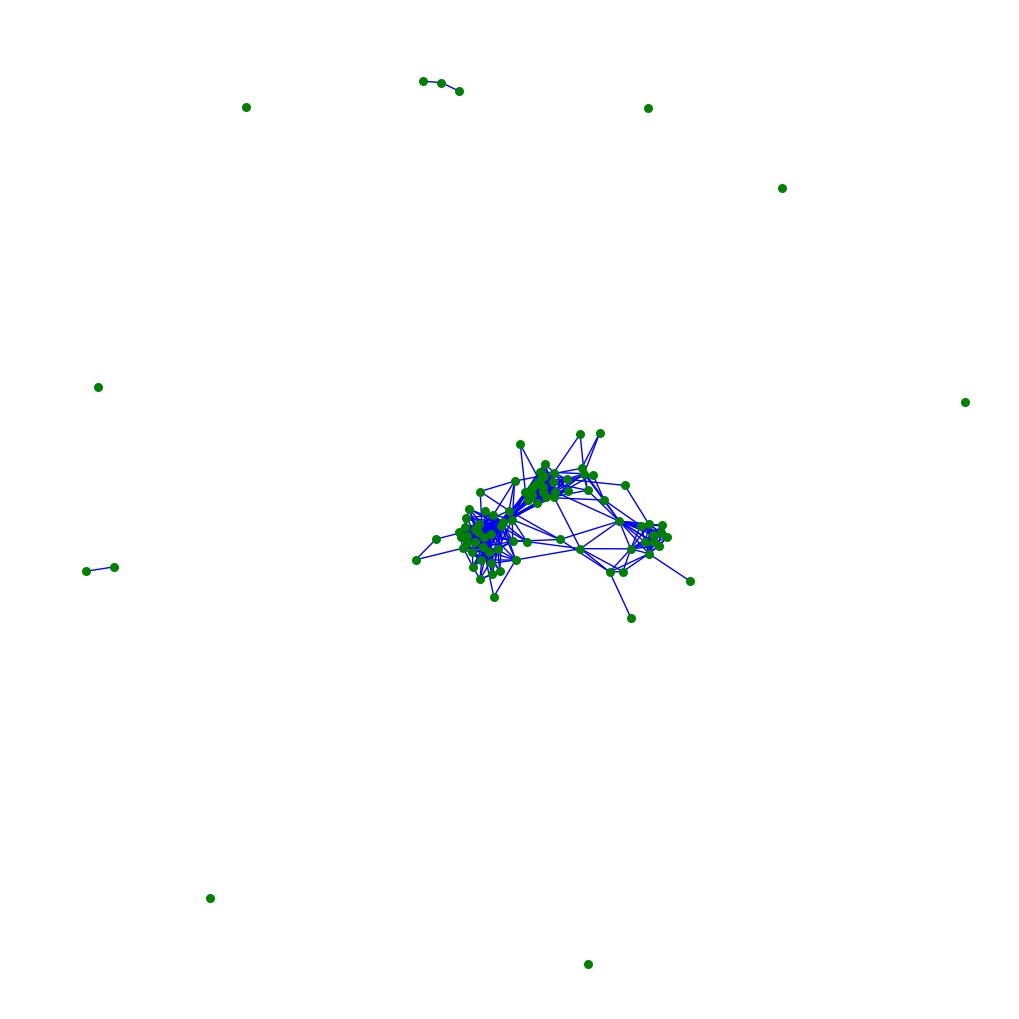

In [23]:
def get_friends_ids(user_id, access_token):
    friends_url = 'https://api.vk.com/method/friends.get?user_id={}&access_token={}&v=5.131'
    json_response = requests.get(friends_url.format(user_id, access_token)).json()
    if json_response.get('error'):
        print(json_response.get('error'))
        return list()
    return json_response['response']['items']

domain = VK_CONFIG["domain"]
access_token = VK_CONFIG["access_token"]
user_id = 121150398

graph = {}
friend_ids = get_friends_ids(user_id, access_token) 

for friend_id in friend_ids:
    # print('Processing id: ', friend_id)
    graph[friend_id] = get_friends_ids(friend_id, access_token)
    time.sleep(0.1) 

g = nx.Graph()
for i in graph:
    g.add_node(i)
    for j in graph[i]:
        if i != j and i in friend_ids and j in friend_ids:
            g.add_edge(i, j)

# Визуализация графа
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(g)
nx.draw(g, pos, node_size=30, with_labels=False, edge_color='blue', node_color='green')
plt.show()


In [28]:
def get_vk_members(group_id, count=1000, offset=0):
    response = requests.get(
        f'{domain}/groups.getMembers?group_id={group_id}&count={count}&offset={offset}&access_token={access_token}&v={v}'
    )
    json_response = response.json()
    
    if not response.ok:
        raise Exception('Bad response code')
    if json_response.get('error'):
        print(json_response.get('error'))
        return list()
    return json_response['response']['items']

def all_count_offset(func, func_id):
    set_members_id = set()
    count_members = -1
    offset = 0
    while count_members != len(set_members_id):
        new_members_id = func(func_id, offset=offset)
        offset += len(new_members_id)
        if set_members_id.union(new_members_id) == set_members_id and set_members_id:
            break
        set_members_id = set_members_id.union(new_members_id)
        count_members = len(set_members_id)

    return set_members_id


meduzaproject
{'error_code': 15, 'error_msg': 'Access denied: group hide members', 'request_params': [{'key': 'group_id', 'value': 'meduzaproject'}, {'key': 'count', 'value': '1000'}, {'key': 'offset', 'value': '0'}, {'key': 'v', 'value': '5.124'}, {'key': 'method', 'value': 'groups.getMembers'}, {'key': 'oauth', 'value': '1'}]}
tj
smmrussia
vedomosti
kommersant_ru
kfm
{'error_code': 100, 'error_msg': 'One of the parameters specified was missing or invalid: group_id not domain', 'request_params': [{'key': 'group_id', 'value': 'kfm'}, {'key': 'count', 'value': '1000'}, {'key': 'offset', 'value': '0'}, {'key': 'v', 'value': '5.124'}, {'key': 'method', 'value': 'groups.getMembers'}, {'key': 'oauth', 'value': '1'}]}
oldlentach
lentaru
lentasport
fastslon
tvrain
sport.tvrain
silverrain
afishagorod
afishavozduh
afishavolna
1tv
russiatv
vesti
ntv
lifenews_ru


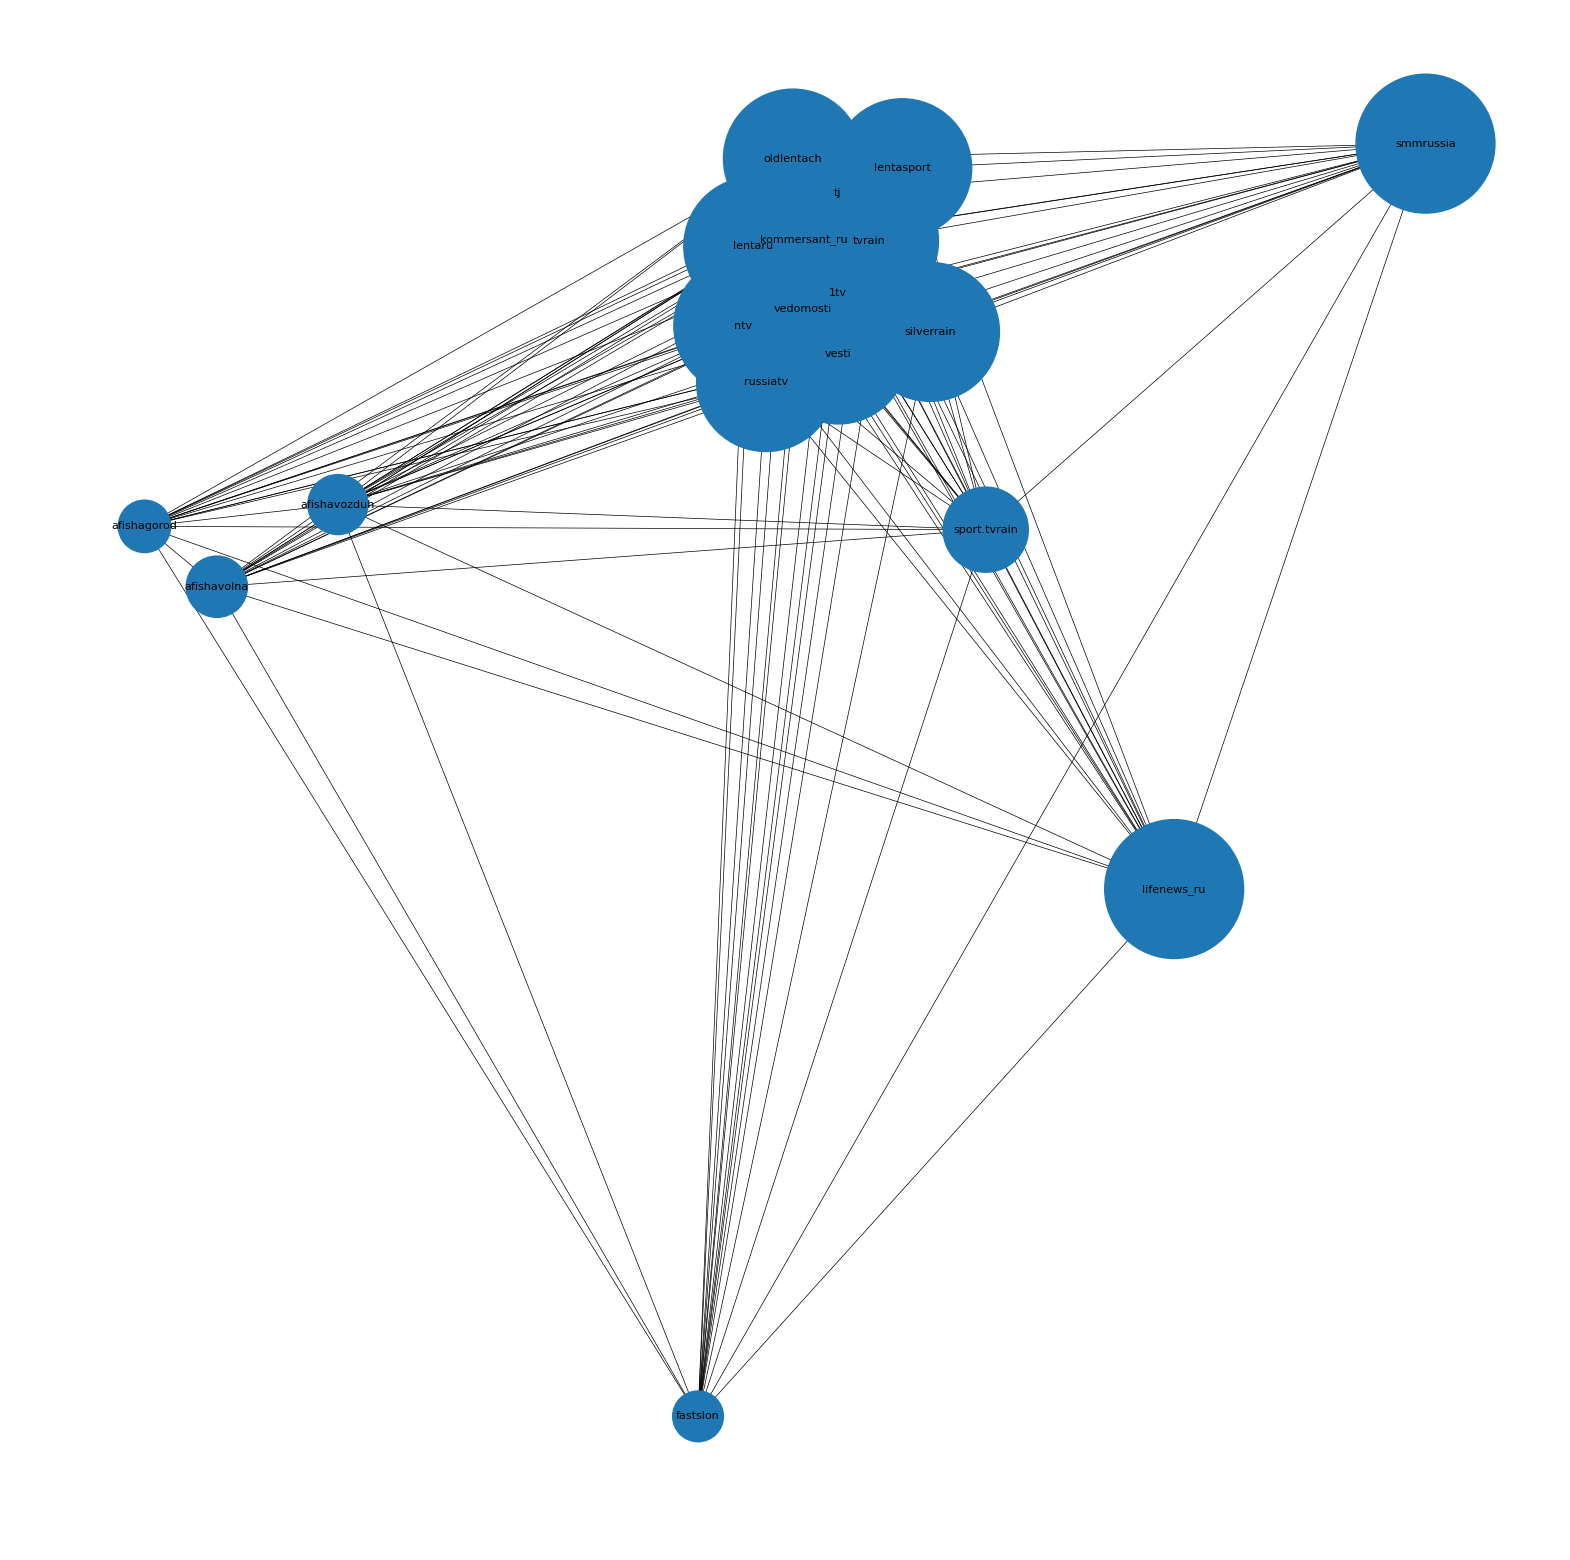

In [29]:

# Список групп
groups = ["meduzaproject", "tj", "smmrussia", "vedomosti", "kommersant_ru", "kfm", "oldlentach",
          "lentaru", "lentasport", "fastslon", "tvrain", "sport.tvrain", "silverrain", "afishagorod",
          "afishavozduh", "afishavolna", "1tv", "russiatv", "vesti", "ntv", "lifenews_ru"]

members = {}
for g in groups:
    print(g)
    members[g] = all_count_offset(get_vk_members, g)
    time.sleep(0.1) 

# Создание матрицы для весов рёбер
matrix = {}
for i in members:
    for j in members:
        if i != j and members[i] and members[j]: 
            key = (i, j)  
            matrix[key] = len(members[i] & members[j]) * 1.0 / min(len(members[i]), len(members[j]))


max_matrix = max(matrix.values())
min_matrix = min(matrix.values())

for i in matrix:
    matrix[i] = (matrix[i] - min_matrix) / (max_matrix - min_matrix)

# Создание графа
g = nx.Graph()
for (i, j), weight in matrix.items():
    g.add_edge(i, j, weight=weight)

# Настройка размера вершин
members_count = {x: len(members[x]) for x in members}
max_value = max(members_count.values()) * 1.0
size = [((members_count[node]/max_value)*900 + 100)*10 for node in g.nodes()]

# Визуализация графа
pos = nx.spring_layout(g)
plt.figure(figsize=(20, 20))
nx.draw_networkx(g, pos, node_size=size, width=0.5, font_size=8)
plt.axis('off')
plt.show()